<a href="https://colab.research.google.com/github/angelikipilioura/Computational-Data-Journalism/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [198]:
# για το scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# για τα nan values
import numpy as np

# για τα γραφήματα
import matplotlib.pyplot as plt

# για την επεξεργασία ελληνικών κειμένων
import spacy

!python -m spacy download el_core_news_sm
nlp = spacy.load('el_core_news_sm')

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.el.examples import sentences
import seaborn as sns
from collections import Counter
from nltk import ngrams
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

2023-07-16 17:19:27.665033: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 89.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


# Δημιουργία csv αρχείων για κάθε site

# Efsyn.gr

In [ ]:
start_page = 0
end_page = 13

start_url = 'https://www.efsyn.gr/oykraniko?page='
main_url = 'https://www.efsyn.gr'
teasers_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo teaser_articles_list***
  teaser_articles_list = doc.find('div', {'class': 'default-teaser triple'}).find_all('article')

  for teaser in teaser_articles_list:
      story_dict = {}
      try:

        #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στο link, ΜΕΤΑ το teaser
        link = teaser.find('a', {'class': 'full-link'})['href']


        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      teasers_list.append(story_dict)
  time.sleep(1)

In [ ]:
# Δημιουργούμε dataframe από τη λίστα με τα dictionaries
efsyn_teasers_df = pd.DataFrame(teasers_list)
efsyn_teasers_df

,url
0,https://www.efsyn.gr/kosmos/eyropi/396920_mahi...
1,https://www.efsyn.gr/kosmos/eyropi/396903_orki...
2,https://www.efsyn.gr/kosmos/eyropi/396890_sfod...
3,https://www.efsyn.gr/kosmos/eyropi/396858_500i...
4,https://www.efsyn.gr/kosmos/396763_ohyrosi-toy...
...,...
163,https://www.efsyn.gr/kosmos/eyropi/389522_anti...
164,https://www.efsyn.gr/kosmos/eyropi/389445_i-an...
165,https://www.efsyn.gr/kosmos/eyropi/389154_pare...
166,https://www.efsyn.gr/kosmos/eyropi/389107_dimo...


In [ ]:
efsyn_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/final_project/csv/efsyn.csv')

In [ ]:
full_articles_list = []

for article_url in efsyn_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('section', {'class': 'article__main'})

  full_article_dict = {}

  # website
  full_article_dict['site'] = "efsyn.gr"

  # url
  full_article_dict['url'] = article_url

  # section
  try:
    section = doc.find('a', {'class': 'article__category'}).text
    full_article_dict['section'] = section
  except:
    full_article_dict['section'] = ''
    pass

  # title
  try:
    title = title = article.find('h1').text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = article.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # author
  try:
    author = article.find('div', {'class', "article__author"}).span.text
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = ''
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = article.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [ ]:
efsyn_full_articles_df = pd.DataFrame(full_articles_list)
efsyn_full_articles_df

,site,url,section,title,date,author,full_text
0,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396920_mahi...,ΕΥΡΩΠΗ,Μαχητές του Αζόφ επέστρεψαν ως ήρωες στην Ουκρ...,2023-07-09 11:05,efsyn.gr,Την ευκαιρία για ένα επικοινωνιακό σόου έδωσε ...
1,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396903_orki...,ΕΥΡΩΠΗ,Ορκίστηκε στη Λετονία ο πρώτος ανοιχτά ομοφυλό...,2023-07-08 20:03,efsyn.gr,Ο επί μακρόν υπουργός Εξωτερικών της Λετονίας ...
2,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396890_sfod...,ΕΥΡΩΠΗ,Σφοδρές αντιδράσεις των συμμάχων των ΗΠΑ για τ...,2023-07-08 16:54,efsyn.gr,Ρήγμα στις σχέσεις ΗΠΑ και ευρωπαϊκών κρατών φ...
3,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396858_500i...,ΕΥΡΩΠΗ,"500ή ημέρα πολέμου στην Ουκρανία: μάχες, νεκρο...",2023-07-08 13:48,efsyn.gr,"Ο πόλεμος στην Ουκρανία, μετά τη ρωσική εισβολ..."
4,efsyn.gr,https://www.efsyn.gr/kosmos/396763_ohyrosi-toy...,ΚΟΣΜΟΣ,Οχύρωση του ΝΑΤΟ με στόχο «τη Ρωσία και την τρ...,2023-07-07 19:46,Επιμέλεια: Νικηφόρος Ζυλάλης,Ανεβάζει την ένταση της γεωπολιτικής διαμάχης ...
...,...,...,...,...,...,...,...
163,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/389522_anti...,ΕΥΡΩΠΗ,Αντικρουόμενα μηνύματα για τη ρωσική υποχώρηση...,2023-05-12 20:26,efsyn.gr,Παραδοχή υποχώρησης των στρατιωτικών της δυνάμ...
164,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/389445_i-an...,ΕΥΡΩΠΗ,Η αντεπίθεση των Ουκρανών και η μάχη του Μπαχμούτ,2023-05-12 12:12,efsyn.gr,Έχοντας συμπληρώσει 443 ημέρες από την εισβολή...
165,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/389154_pare...,ΕΥΡΩΠΗ,"Παρέλαση στη Μόσχα, απελπισία στο Μπαχμούτ",2023-05-10 06:00,Γιώργος Τσιάρας,Με την καθιερωμένη στρατιωτική παρέλαση στην Κ...
166,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/389107_dimo...,ΕΥΡΩΠΗ,Δημοσιογράφος του Γαλλικού Πρακτορείου νεκρός ...,2023-05-09 23:52,efsyn.gr,Ο άτυχος δημοσιογράφος Αρμάν Σολντίν Ο συν...


In [ ]:
efsyn_full_articles_df['datetime'] = pd.to_datetime(efsyn_full_articles_df['date'], format='%Y-%m-%d %H:%M')
efsyn_full_articles_df.head()

,site,url,section,title,date,author,full_text,datetime
0,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396920_mahi...,ΕΥΡΩΠΗ,Μαχητές του Αζόφ επέστρεψαν ως ήρωες στην Ουκρ...,2023-07-09 11:05,efsyn.gr,Την ευκαιρία για ένα επικοινωνιακό σόου έδωσε ...,2023-07-09 11:05:00
1,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396903_orki...,ΕΥΡΩΠΗ,Ορκίστηκε στη Λετονία ο πρώτος ανοιχτά ομοφυλό...,2023-07-08 20:03,efsyn.gr,Ο επί μακρόν υπουργός Εξωτερικών της Λετονίας ...,2023-07-08 20:03:00
2,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396890_sfod...,ΕΥΡΩΠΗ,Σφοδρές αντιδράσεις των συμμάχων των ΗΠΑ για τ...,2023-07-08 16:54,efsyn.gr,Ρήγμα στις σχέσεις ΗΠΑ και ευρωπαϊκών κρατών φ...,2023-07-08 16:54:00
3,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396858_500i...,ΕΥΡΩΠΗ,"500ή ημέρα πολέμου στην Ουκρανία: μάχες, νεκρο...",2023-07-08 13:48,efsyn.gr,"Ο πόλεμος στην Ουκρανία, μετά τη ρωσική εισβολ...",2023-07-08 13:48:00
4,efsyn.gr,https://www.efsyn.gr/kosmos/396763_ohyrosi-toy...,ΚΟΣΜΟΣ,Οχύρωση του ΝΑΤΟ με στόχο «τη Ρωσία και την τρ...,2023-07-07 19:46,Επιμέλεια: Νικηφόρος Ζυλάλης,Ανεβάζει την ένταση της γεωπολιτικής διαμάχης ...,2023-07-07 19:46:00


In [ ]:
efsyn_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/final_project/csv/efsyn_full_articles.csv', index=False)

# Newsit.gr

In [ ]:
start_page = 2
end_page = 10

start_url = 'https://www.newsit.gr/tags/oukrania/page/'

teasers_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num) + '/'
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo teaser_articles_list***
  teaser_articles_list = doc.find('div', {'class': 'hfeed site grid-container container grid-parent'}).find_all('article')



  for teaser in teaser_articles_list:
      story_dict = {}
      try:

        #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στο link, ΜΕΤΑ το teaser
        link = teaser.find('a')['href']


        if link.startswith("http"):
          story_dict['url'] = link
      except:
        story_dict['url'] = ''
        pass
      teasers_list.append(story_dict)
  time.sleep(1)

In [ ]:
# Δημιουργούμε dataframe από τη λίστα με τα dictionaries
newsit_teasers_df = pd.DataFrame(teasers_list)
newsit_teasers_df

,url
0,https://www.newsit.gr/kosmos/polemos-stin-oukr...
1,https://www.newsit.gr/kosmos/kataggelies-gia-T...
2,https://www.newsit.gr/kosmos/oukrania-sklires-...
3,https://www.newsit.gr/kosmos/polemos-stin-oukr...
4,https://www.newsit.gr/kosmos/polemos-stin-oukr...
...,...
175,https://www.newsit.gr/kosmos/polemos-stin-oukr...
176,https://www.newsit.gr/kosmos/ipa-allazoun-stas...
177,https://www.newsit.gr/kosmos/oukrania-aixmes-z...
178,https://www.newsit.gr/kosmos/G7-kai-ipa-epival...


In [ ]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/final_project/csv/newsit.csv')

In [ ]:
full_articles_list = []

for article_url in newsit_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('div', {'class': 'grid-container grid-parent'})

  full_article_dict = {}

  # website
  full_article_dict['site'] = "newsit.gr"

  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = article.find_all('a')
    if len(section) > 1:
      full_article_dict['section'] = section[1].get_text(strip=True)
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = doc.find('h1', {'class': 'entry-title'}).text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = doc.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # author
  try:
    author = doc.find('span', {'class', "author-name"}).text
    author = author.strip()
    author = author.replace('\r', '').replace('\n', '').strip()
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = ''
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = doc.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)


,site,url,section,title,date,author,full_text
0,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: Νεκρή η συγγραφέας Vict...,2023-07-03T08:05:37+03:00,Αλεξια Κωνσταντοπουλου,NewsIT Κοσμος Νεκρη η Ουκρανη συγγραφεας Victo...
1,newsit.gr,https://www.newsit.gr/kosmos/kataggelies-gia-T...,Κοσμος,Καταγγελίες για Total και Shell για πωλήσεις φ...,2023-07-03T07:49:45+03:00,Δημητρης Καπετανοπουλος,NewsIT Κοσμος Καταγγελιες για Total και Shell ...
2,newsit.gr,https://www.newsit.gr/kosmos/oukrania-sklires-...,Κοσμος,Ουκρανία: «Σκληρές μάχες» κατά του ρωσικού στρ...,2023-07-03T00:32:54+03:00,Αθηνα Σκορδιαλου,NewsIT Κοσμος Ουκρανια: «Σκληρες μαχες» κατα τ...
3,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: Επίθεση της Ρωσίας με d...,2023-07-02T10:05:39+03:00,Κωνσταντινος Μακρης,NewsIT Κοσμος Επιθεση της Ρωσιας με drones στο...
4,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: Βέβαιος ο Λουκασένκο ότ...,2023-07-01T08:02:37+03:00,Κωνσταντινος Μακρης,NewsIT Κοσμος Βεβαιος ο Λουκασενκο οτι τα ρωσι...
...,...,...,...,...,...,...,...
175,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: «Πράσινο» φως Μπάιντεν ...,2023-05-19T21:16:14+03:00,Κωνσταντινος Μακρης,NewsIT Κοσμος «Πρασινο» φως Μπαιντεν για παραδ...
176,newsit.gr,https://www.newsit.gr/kosmos/ipa-allazoun-stas...,Κοσμος,ΗΠΑ: Αλλάζουν στάση για τα F-16 στην Ουκρανία ...,2023-05-19T18:43:16+03:00,Διονυσης Χατζημιχαλης,NewsIT Κοσμος ΗΠΑ: Αλλαζουν σταση για τα F-16 ...
177,newsit.gr,https://www.newsit.gr/kosmos/oukrania-aixmes-z...,Κοσμος,Ουκρανία: Αιχμές Ζελένσκι στην ομιλία του στη ...,2023-05-19T17:51:08+03:00,Αθηνα Σκορδιαλου,NewsIT Κοσμος Αιχμες Ζελενσκι στη συνοδο κορυφ...
178,newsit.gr,https://www.newsit.gr/kosmos/G7-kai-ipa-epival...,Κοσμος,G7 και ΗΠΑ επιβάλλουν νέες κυρώσεις στη Ρωσία ...,2023-05-19T17:18:45+03:00,Διονυσης Χατζημιχαλης,NewsIT Κοσμος G7 και ΗΠΑ επιβαλλουν νεες κυρωσ...


In [ ]:
newsit_full_articles_df = pd.DataFrame(full_articles_list)
newsit_full_articles_df

In [ ]:
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], format='%Y-%m-%d %H:%M').dt.tz_localize(None)
newsit_full_articles_df.head()

,site,url,section,title,date,author,full_text,datetime
0,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: Νεκρή η συγγραφέας Vict...,2023-07-03T08:05:37+03:00,Αλεξια Κωνσταντοπουλου,NewsIT Κοσμος Νεκρη η Ουκρανη συγγραφεας Victo...,2023-07-03 08:05:37
1,newsit.gr,https://www.newsit.gr/kosmos/kataggelies-gia-T...,Κοσμος,Καταγγελίες για Total και Shell για πωλήσεις φ...,2023-07-03T07:49:45+03:00,Δημητρης Καπετανοπουλος,NewsIT Κοσμος Καταγγελιες για Total και Shell ...,2023-07-03 07:49:45
2,newsit.gr,https://www.newsit.gr/kosmos/oukrania-sklires-...,Κοσμος,Ουκρανία: «Σκληρές μάχες» κατά του ρωσικού στρ...,2023-07-03T00:32:54+03:00,Αθηνα Σκορδιαλου,NewsIT Κοσμος Ουκρανια: «Σκληρες μαχες» κατα τ...,2023-07-03 00:32:54
3,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: Επίθεση της Ρωσίας με d...,2023-07-02T10:05:39+03:00,Κωνσταντινος Μακρης,NewsIT Κοσμος Επιθεση της Ρωσιας με drones στο...,2023-07-02 10:05:39
4,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: Βέβαιος ο Λουκασένκο ότ...,2023-07-01T08:02:37+03:00,Κωνσταντινος Μακρης,NewsIT Κοσμος Βεβαιος ο Λουκασενκο οτι τα ρωσι...,2023-07-01 08:02:37


In [ ]:
newsit_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/final_project/csv/newsit_full_articles_df.csv', index=False)

# Kathimerini.gr

In [ ]:
start_page = 2
end_page = 16

start_url = 'https://www.kathimerini.gr/tag/polemos-stin-oykrania/page/'

teasers_list = []

for page_num in range(start_page, end_page+1):
    page_url = start_url + str(page_num) + '/'
    response = requests.get(page_url)
    doc = BeautifulSoup(response.text, 'html.parser')

    teaser_articles_list = doc.select('div.nx-article.column.is-full.cat-template3')  # Changed this line

    for teaser in teaser_articles_list:
        story_dict = {}
        try:
            link = teaser.find('a')['href']
            if link.startswith("http"):
                story_dict['url'] = link
        except:
            story_dict['url'] = ''
        teasers_list.append(story_dict)
    time.sleep(1)

In [ ]:
# Δημιουργούμε dataframe από τη λίστα με τα dictionaries
kathimerini_teasers_df = pd.DataFrame(teasers_list)
kathimerini_teasers_df

,url
0,https://www.kathimerini.gr/world/562503448/ipa...
1,https://www.kathimerini.gr/world/562504612/i-o...
2,https://www.kathimerini.gr/world/562504579/o-z...
3,https://www.kathimerini.gr/world/562504507/oyk...
4,https://www.kathimerini.gr/world/562504474/o-p...
...,...
175,https://www.kathimerini.gr/world/562455106/vat...
176,https://www.kathimerini.gr/world/562455100/oyk...
177,https://www.kathimerini.gr/world/562454938/cnn...
178,https://www.kathimerini.gr/world/562454419/oi-...


In [ ]:
kathimerini_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/final_project/csv/kathimerini.csv')

In [ ]:
full_articles_list = []

for article_url in kathimerini_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('div', {'class': 'grid-container grid-parent'})

  full_article_dict = {}

  # website
  full_article_dict['site'] = "kathimerini.gr"

  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = doc.find('span', {'class': 'nx-single-category-title color-primary'}).get_text(strip=True)
    full_article_dict['section'] = section
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = doc.find('h1', {'class': 'entry-title'}).text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = doc.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  #author
  try:
    author = doc.find('a', {'class': 'url fn n', 'rel': 'author'}).text
    author = author.strip().replace('\r', '').replace('\n', '')
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = ''
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = doc.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [ ]:
kathimerini_full_articles_df = pd.DataFrame(full_articles_list)
kathimerini_full_articles_df

,site,url,section,title,date,author,full_text
0,kathimerini.gr,https://www.kathimerini.gr/world/562503448/ipa...,The New York Times,ΗΠΑ: Η ρωσική πρεσβεία επίκεντρο μάχης εντυπώσ...,2023-07-05T07:35:44+03:00,Newsroom,Το φυλάκιο της Ρωσίας στην αμερικανική πρωτεύο...
1,kathimerini.gr,https://www.kathimerini.gr/world/562504612/i-o...,Κόσμος,Η Ουκρανία προειδοποιεί για ρωσική «προβοκάτσι...,2023-07-04T23:46:39+03:00,Newsroom,Ο ουκρανικός στρατός προειδοποίησε για «προετο...
2,kathimerini.gr,https://www.kathimerini.gr/world/562504579/o-z...,Κόσμος,Ο Ζελένσκι χαιρετίζει τις «προσωπικές προσπάθε...,2023-07-04T22:29:46+03:00,Newsroom,Ο Ουκρανός πρόεδρος συνεχάρη τον επικεφαλής το...
3,kathimerini.gr,https://www.kathimerini.gr/world/562504507/oyk...,Κόσμος,Ουκρανία: Τουλάχιστον 38 τραυματίες από ρωσική...,2023-07-04T20:52:46+03:00,Newsroom,"Τουλάχιστον 38 άνθρωποι τραυματίστηκαν σήμερα,..."
4,kathimerini.gr,https://www.kathimerini.gr/world/562504474/o-p...,ΛΕΥΚΟΡΩΣΙΑ,Ο εξόριστος Πριγκόζιν «στήνει» βάσεις της Wagn...,2023-07-04T20:40:05+03:00,Newsroom,Ο Γεβγκένι Πριγκόζιν υποστηρίζει ότι μισθοφόρο...
...,...,...,...,...,...,...,...
175,kathimerini.gr,https://www.kathimerini.gr/world/562455106/vat...,Κόσμος,Βατικανό: «Λειτουργία εξαγνισμού» στη Βασιλική...,2023-06-03T23:55:23+03:00,Newsroom,"Την ώρα που ο ναός έκλεινε, ένας Πολωνός έβγαλ..."
176,kathimerini.gr,https://www.kathimerini.gr/world/562455100/oyk...,Κόσμος,Ουκρανία: Τουλάχιστον 13 τραυματίες από έκρηξη...,2023-06-03T23:44:49+03:00,Newsroom,Ο κυβερνήτης της περιοχής εξέφρασε φόβους ότι ...
177,kathimerini.gr,https://www.kathimerini.gr/world/562454938/cnn...,Κόσμος,CNN: Εντός του μυστικού προγράμματος της Ουκρα...,2023-06-03T17:29:00+03:00,Newsroom,Ο πιθανός στρατιωτικός «game changer» της Ουκρ...
178,kathimerini.gr,https://www.kathimerini.gr/world/562454419/oi-...,Κόσμος,Οι πλέον πολύνεκροι πόλεμοι είναι αυτοί για το...,2023-06-02T19:28:50+03:00,Γιώργος Σκαφιδάς,Ο πλέον πολύνεκρος πόλεμος διεθνώς μετά τον Β΄...


In [ ]:
kathimerini_full_articles_df['datetime'] = pd.to_datetime(kathimerini_full_articles_df['date'], format='%Y-%m-%d %H:%M').dt.tz_localize(None)
kathimerini_full_articles_df.head()

,site,url,section,title,date,author,full_text,datetime
0,kathimerini.gr,https://www.kathimerini.gr/world/562503448/ipa...,The New York Times,ΗΠΑ: Η ρωσική πρεσβεία επίκεντρο μάχης εντυπώσ...,2023-07-05T07:35:44+03:00,Newsroom,Το φυλάκιο της Ρωσίας στην αμερικανική πρωτεύο...,2023-07-05 07:35:44
1,kathimerini.gr,https://www.kathimerini.gr/world/562504612/i-o...,Κόσμος,Η Ουκρανία προειδοποιεί για ρωσική «προβοκάτσι...,2023-07-04T23:46:39+03:00,Newsroom,Ο ουκρανικός στρατός προειδοποίησε για «προετο...,2023-07-04 23:46:39
2,kathimerini.gr,https://www.kathimerini.gr/world/562504579/o-z...,Κόσμος,Ο Ζελένσκι χαιρετίζει τις «προσωπικές προσπάθε...,2023-07-04T22:29:46+03:00,Newsroom,Ο Ουκρανός πρόεδρος συνεχάρη τον επικεφαλής το...,2023-07-04 22:29:46
3,kathimerini.gr,https://www.kathimerini.gr/world/562504507/oyk...,Κόσμος,Ουκρανία: Τουλάχιστον 38 τραυματίες από ρωσική...,2023-07-04T20:52:46+03:00,Newsroom,"Τουλάχιστον 38 άνθρωποι τραυματίστηκαν σήμερα,...",2023-07-04 20:52:46
4,kathimerini.gr,https://www.kathimerini.gr/world/562504474/o-p...,ΛΕΥΚΟΡΩΣΙΑ,Ο εξόριστος Πριγκόζιν «στήνει» βάσεις της Wagn...,2023-07-04T20:40:05+03:00,Newsroom,Ο Γεβγκένι Πριγκόζιν υποστηρίζει ότι μισθοφόρο...,2023-07-04 20:40:05


In [ ]:
kathimerini_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/final_project/csv/kathimerini_full_articles.csv', index=False)

# Read csvs from drive

# Efsyn.gr

In [199]:
efsyn_full_articles_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_project/csv/efsyn_full_articles.csv')

In [200]:
# Getting a list of Greek stop words
stop_words = list(nlp.Defaults.stop_words)

# Drop any duplicates
efsyn_full_articles_df.drop_duplicates(inplace=True)

# Replace empty strings with np.nan
efsyn_full_articles_df.replace('', np.nan, inplace=True)

# Drop the rows where at least one element is missing
efsyn_full_articles_df.dropna(inplace=True)

# Cleaning data: dropping any rows that contain NaN values
efsyn_full_articles_df = efsyn_full_articles_df.dropna()

# Removing redundant white spaces
efsyn_full_articles_df['full_text'] = efsyn_full_articles_df['full_text'].apply(lambda x: ' '.join(x.split()))

# Word count before removing stop words
word_count = efsyn_full_articles_df['full_text'].apply(lambda x: len(x.split()))

# Stop words count
stopwords_count = efsyn_full_articles_df['full_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

# Percentage of total words that are stop words
efsyn_full_articles_df['stopwords_pct'] = (stopwords_count / word_count * 100).round(2)

# Lemmatization
def lemmatize_text(text):
    return ' '.join([token.lemma_ for token in nlp(text)])

efsyn_full_articles_df['full_text'] = efsyn_full_articles_df['full_text'].apply(lemmatize_text)

# Text processing: removing stop words
efsyn_full_articles_df['full_text'] = efsyn_full_articles_df['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Drop the 'date' column because we've converted it into 'datetime':
efsyn_full_articles_df.drop(columns=['date'], inplace=True)

# Adding new parameters: year, month
efsyn_full_articles_df['datetime'] = pd.to_datetime(efsyn_full_articles_df['datetime'])
efsyn_full_articles_df['year'] = efsyn_full_articles_df['datetime'].dt.year
efsyn_full_articles_df['month'] = efsyn_full_articles_df['datetime'].dt.month

efsyn_full_articles_df['word_count'] = efsyn_full_articles_df['full_text'].apply(lambda x: len(x.split()))

# Print dataframe
efsyn_full_articles_df.head()


,site,url,section,title,author,full_text,datetime,stopwords_pct,year,month,word_count
0,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396920_mahi...,ΕΥΡΩΠΗ,Μαχητές του Αζόφ επέστρεψαν ως ήρωες στην Ουκρ...,efsyn.gr,ευκαιρία επικοινωνιακός σόου δίνω Ταγίπ ερντογ...,2023-07-09 11:05:00,44.77,2023,7,191
1,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396903_orki...,ΕΥΡΩΠΗ,Ορκίστηκε στη Λετονία ο πρώτος ανοιχτά ομοφυλό...,efsyn.gr,μακρόν υπουργός εξωτερικά Λετονία Έντγκαρς Ρίν...,2023-07-08 20:03:00,41.41,2023,7,223
2,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396890_sfod...,ΕΥΡΩΠΗ,Σφοδρές αντιδράσεις των συμμάχων των ΗΠΑ για τ...,efsyn.gr,Ρήγμα σχέση ΗΠΑ ευρωπαϊκός κράτος φαίνομαι δημ...,2023-07-08 16:54:00,42.45,2023,7,736
3,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396858_500i...,ΕΥΡΩΠΗ,"500ή ημέρα πολέμου στην Ουκρανία: μάχες, νεκρο...",efsyn.gr,"πόλεμος Ουκρανία , ρωσικός εισβολή 24 Φεβρουαρ...",2023-07-08 13:48:00,39.96,2023,7,823
4,efsyn.gr,https://www.efsyn.gr/kosmos/396763_ohyrosi-toy...,ΚΟΣΜΟΣ,Οχύρωση του ΝΑΤΟ με στόχο «τη Ρωσία και την τρ...,Επιμέλεια: Νικηφόρος Ζυλάλης,Ανεβάζω ένταση γεωπολιτικός διαμάχη επίκεντρο ...,2023-07-07 19:46:00,43.17,2023,7,385


# Newsit.gr

In [201]:
newsit_full_articles_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_project/csv/newsit_full_articles_df.csv')

In [202]:
# Getting a list of Greek stop words
stop_words = list(nlp.Defaults.stop_words)

# Drop any duplicates
newsit_full_articles_df.drop_duplicates(inplace=True)

# Replace empty strings with np.nan
newsit_full_articles_df.replace('', np.nan, inplace=True)

# Drop the rows where at least one element is missing
newsit_full_articles_df.dropna(inplace=True)

# Cleaning data: dropping any rows that contain NaN values
newsit_full_articles_df = newsit_full_articles_df.dropna()

# Removing redundant white spaces
newsit_full_articles_df['full_text'] = newsit_full_articles_df['full_text'].apply(lambda x: ' '.join(x.split()))

# Word count before removing stop words
word_count = newsit_full_articles_df['full_text'].apply(lambda x: len(x.split()))

# Stop words count
stopwords_count = newsit_full_articles_df['full_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

# Percentage of total words that are stop words
newsit_full_articles_df['stopwords_pct'] = (stopwords_count / word_count * 100).round(2)

# Lemmatization
def lemmatize_text(text):
    return ' '.join([token.lemma_ for token in nlp(text)])

newsit_full_articles_df['full_text'] = newsit_full_articles_df['full_text'].apply(lemmatize_text)

# Text processing: removing stop words
newsit_full_articles_df['full_text'] = newsit_full_articles_df['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Drop the 'date' column because we've converted it into 'datetime':
newsit_full_articles_df.drop(columns=['date'], inplace=True)

# Adding new parameters: year, month
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['datetime'])
newsit_full_articles_df['year'] = newsit_full_articles_df['datetime'].dt.year
newsit_full_articles_df['month'] = newsit_full_articles_df['datetime'].dt.month

newsit_full_articles_df['word_count'] = newsit_full_articles_df['full_text'].apply(lambda x: len(x.split()))

# Print dataframe
newsit_full_articles_df.head()

,site,url,section,title,author,full_text,datetime,stopwords_pct,year,month,word_count
0,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: Νεκρή η συγγραφέας Vict...,Αλεξια Κωνσταντοπουλου,NewsIT Κοσμος Νεκρη Ουκρανη συγγραφεας Victori...,2023-07-03 08:05:37,37.50,2023,7,183
1,newsit.gr,https://www.newsit.gr/kosmos/kataggelies-gia-T...,Κοσμος,Καταγγελίες για Total και Shell για πωλήσεις φ...,Δημητρης Καπετανοπουλος,NewsIT Κοσμος Καταγγελιες Total Shell πωλησεις...,2023-07-03 07:49:45,39.22,2023,7,289
2,newsit.gr,https://www.newsit.gr/kosmos/oukrania-sklires-...,Κοσμος,Ουκρανία: «Σκληρές μάχες» κατά του ρωσικού στρ...,Αθηνα Σκορδιαλου,NewsIT Κοσμος Ουκρανια : « Σκληρες μαχα » κα ρ...,2023-07-03 00:32:54,33.56,2023,7,130
3,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: Επίθεση της Ρωσίας με d...,Κωνσταντινος Μακρης,NewsIT Κοσμος επιθεση Ρωσια drones Κιεβο - πρω...,2023-07-02 10:05:39,38.30,2023,7,101
4,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Κοσμος,Πόλεμος στην Ουκρανία: Βέβαιος ο Λουκασένκο ότ...,Κωνσταντινος Μακρης,NewsIT Κοσμος Βεβαιος Λουκασενκο οτι ρωσικος π...,2023-07-01 08:02:37,42.52,2023,7,188


# Kathimerini.gr

In [203]:
kathimerini_full_articles_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_project/csv/kathimerini_full_articles.csv')

In [204]:
# Getting a list of Greek stop words
stop_words = list(nlp.Defaults.stop_words)

# Drop any duplicates
kathimerini_full_articles_df.drop_duplicates(inplace=True)

# Replace empty strings with np.nan
kathimerini_full_articles_df.replace('', np.nan, inplace=True)

# Drop the rows where at least one element is missing
kathimerini_full_articles_df.dropna(inplace=True)

# Cleaning data: dropping any rows that contain NaN values
kathimerini_full_articles_df = kathimerini_full_articles_df.dropna()

# Removing redundant white spaces
kathimerini_full_articles_df['full_text'] = kathimerini_full_articles_df['full_text'].apply(lambda x: ' '.join(x.split()))

# Word count before removing stop words
word_count = kathimerini_full_articles_df['full_text'].apply(lambda x: len(x.split()))

# Stop words count
stopwords_count = kathimerini_full_articles_df['full_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

# Percentage of total words that are stop words
kathimerini_full_articles_df['stopwords_pct'] = (stopwords_count / word_count * 100).round(2)

# Lemmatization
def lemmatize_text(text):
    return ' '.join([token.lemma_ for token in nlp(text)])

kathimerini_full_articles_df['full_text'] = kathimerini_full_articles_df['full_text'].apply(lemmatize_text)

# Text processing: removing stop words
kathimerini_full_articles_df['full_text'] = kathimerini_full_articles_df['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Drop the 'date' column because we've converted it into 'datetime':
kathimerini_full_articles_df.drop(columns=['date'], inplace=True)

# Adding new parameters: year, month
kathimerini_full_articles_df['datetime'] = pd.to_datetime(kathimerini_full_articles_df['datetime'])
kathimerini_full_articles_df['year'] = kathimerini_full_articles_df['datetime'].dt.year
kathimerini_full_articles_df['month'] = kathimerini_full_articles_df['datetime'].dt.month

kathimerini_full_articles_df['word_count'] = kathimerini_full_articles_df['full_text'].apply(lambda x: len(x.split()))

# Print dataframe
kathimerini_full_articles_df.head()


,site,url,section,title,author,full_text,datetime,stopwords_pct,year,month,word_count
0,kathimerini.gr,https://www.kathimerini.gr/world/562503448/ipa...,The New York Times,ΗΠΑ: Η ρωσική πρεσβεία επίκεντρο μάχης εντυπώσ...,Newsroom,φυλάκιο Ρωσία αμερικάνικος πρωτεύουσα θέατρο δ...,2023-07-05 07:35:44,43.43,2023,7,613
1,kathimerini.gr,https://www.kathimerini.gr/world/562504612/i-o...,Κόσμος,Η Ουκρανία προειδοποιεί για ρωσική «προβοκάτσι...,Newsroom,ουκρανικός στρατός προειδοποίησε « προετοιμασί...,2023-07-04 23:46:39,35.51,2023,7,247
2,kathimerini.gr,https://www.kathimerini.gr/world/562504579/o-z...,Κόσμος,Ο Ζελένσκι χαιρετίζει τις «προσωπικές προσπάθε...,Newsroom,"Ουκρανός πρόεδρος συνεχάρη επικεφαλής ΝΑΤΟ , Γ...",2023-07-04 22:29:46,41.75,2023,7,74
3,kathimerini.gr,https://www.kathimerini.gr/world/562504507/oyk...,Κόσμος,Ουκρανία: Τουλάχιστον 38 τραυματίες από ρωσική...,Newsroom,"Τουλάχιστον 38 άνθρωπος τραυματίζω σήμερα , αν...",2023-07-04 20:52:46,36.91,2023,7,169
4,kathimerini.gr,https://www.kathimerini.gr/world/562504474/o-p...,ΛΕΥΚΟΡΩΣΙΑ,Ο εξόριστος Πριγκόζιν «στήνει» βάσεις της Wagn...,Newsroom,Γεβγκένι πριγκόζιν υποστηρίζω μισθοφόρος ομάδα...,2023-07-04 20:40:05,43.26,2023,7,181


# Merged


In [205]:
articles_df = pd.concat([efsyn_full_articles_df, newsit_full_articles_df, kathimerini_full_articles_df], ignore_index=True)
articles_df['datetime'] = pd.to_datetime(articles_df['datetime'])
articles_df.head()

,site,url,section,title,author,full_text,datetime,stopwords_pct,year,month,word_count
0,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396920_mahi...,ΕΥΡΩΠΗ,Μαχητές του Αζόφ επέστρεψαν ως ήρωες στην Ουκρ...,efsyn.gr,ευκαιρία επικοινωνιακός σόου δίνω Ταγίπ ερντογ...,2023-07-09 11:05:00,44.77,2023,7,191
1,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396903_orki...,ΕΥΡΩΠΗ,Ορκίστηκε στη Λετονία ο πρώτος ανοιχτά ομοφυλό...,efsyn.gr,μακρόν υπουργός εξωτερικά Λετονία Έντγκαρς Ρίν...,2023-07-08 20:03:00,41.41,2023,7,223
2,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396890_sfod...,ΕΥΡΩΠΗ,Σφοδρές αντιδράσεις των συμμάχων των ΗΠΑ για τ...,efsyn.gr,Ρήγμα σχέση ΗΠΑ ευρωπαϊκός κράτος φαίνομαι δημ...,2023-07-08 16:54:00,42.45,2023,7,736
3,efsyn.gr,https://www.efsyn.gr/kosmos/eyropi/396858_500i...,ΕΥΡΩΠΗ,"500ή ημέρα πολέμου στην Ουκρανία: μάχες, νεκρο...",efsyn.gr,"πόλεμος Ουκρανία , ρωσικός εισβολή 24 Φεβρουαρ...",2023-07-08 13:48:00,39.96,2023,7,823
4,efsyn.gr,https://www.efsyn.gr/kosmos/396763_ohyrosi-toy...,ΚΟΣΜΟΣ,Οχύρωση του ΝΑΤΟ με στόχο «τη Ρωσία και την τρ...,Επιμέλεια: Νικηφόρος Ζυλάλης,Ανεβάζω ένταση γεωπολιτικός διαμάχη επίκεντρο ...,2023-07-07 19:46:00,43.17,2023,7,385


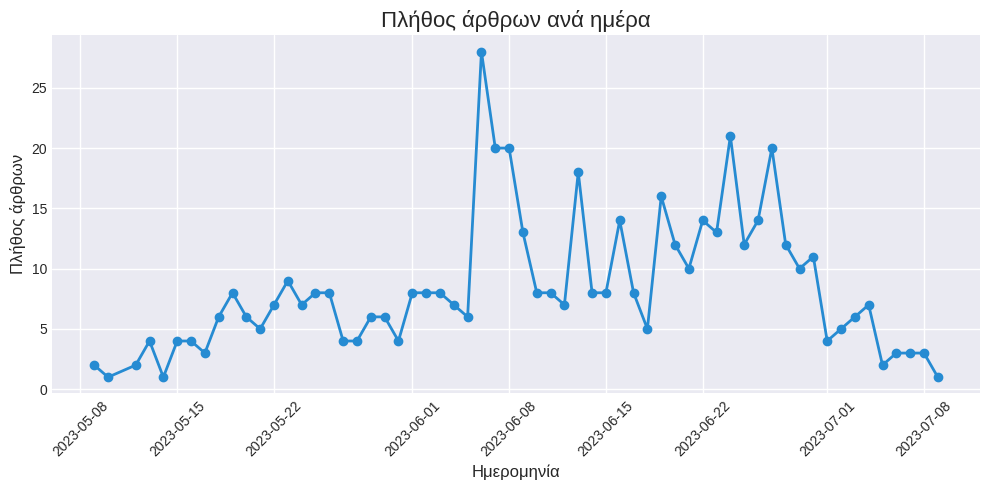

In [206]:
# Πλήθος των άρθρων ανά ημέρα
articles_per_day = articles_df['datetime'].dt.date.value_counts().sort_index()

# Κατασκευή γραφήματος για τα άρθρα ανά ημέρα
plt.figure(figsize=(10,5))
plt.plot(articles_per_day.index, articles_per_day.values, marker='o')
plt.xlabel('Ημερομηνία')
plt.ylabel('Πλήθος άρθρων')
plt.title('Πλήθος άρθρων ανά ημέρα')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

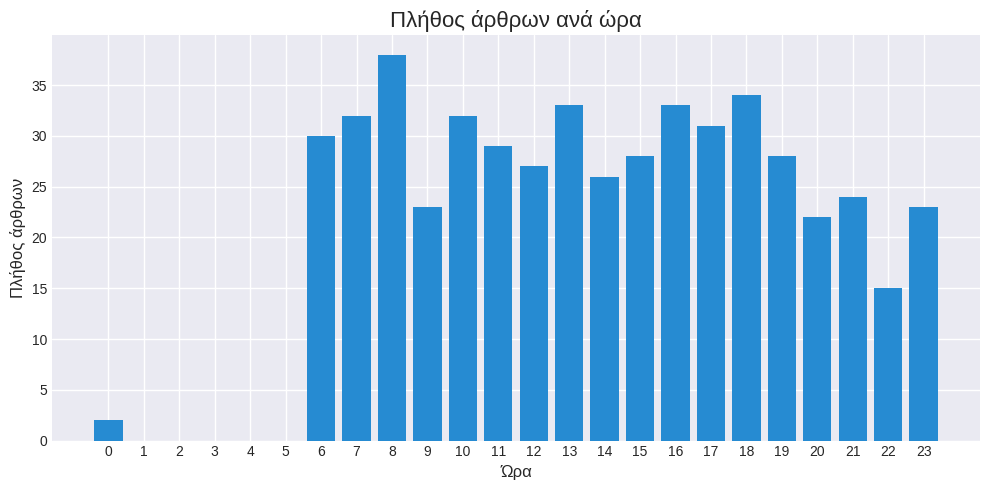

In [207]:
# Πλήθος των άρθρων ανά ώρα
articles_per_hour = articles_df['datetime'].dt.hour.value_counts().sort_index()

# Κατασκευή γραφήματος για τα άρθρα ανά ώρα
plt.figure(figsize=(10,5))
plt.bar(articles_per_hour.index, articles_per_hour.values)
plt.xlabel('Ώρα')
plt.ylabel('Πλήθος άρθρων')
plt.title('Πλήθος άρθρων ανά ώρα')
plt.xticks(np.arange(0, 24, step=1))
plt.grid(True)
plt.tight_layout()

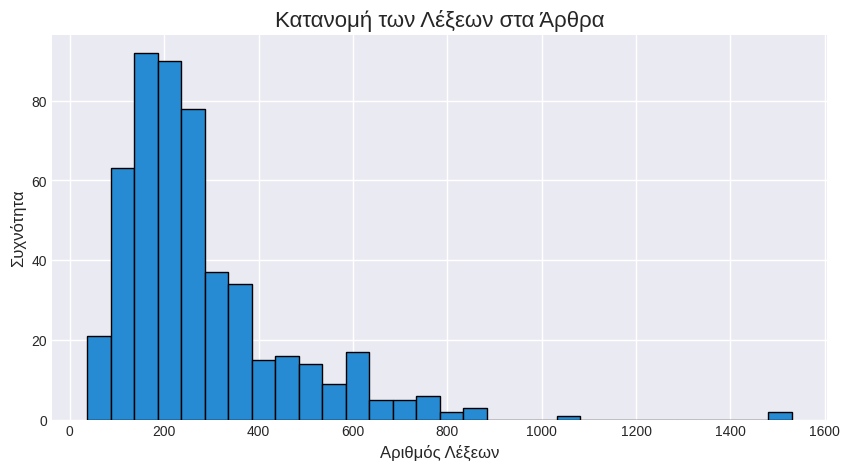

In [208]:
plt.figure(figsize=(10,5))
plt.hist(articles_df['word_count'], bins=30, edgecolor='black')
plt.title('Κατανομή των Λέξεων στα Άρθρα')
plt.xlabel('Αριθμός Λέξεων')
plt.ylabel('Συχνότητα')
plt.show()

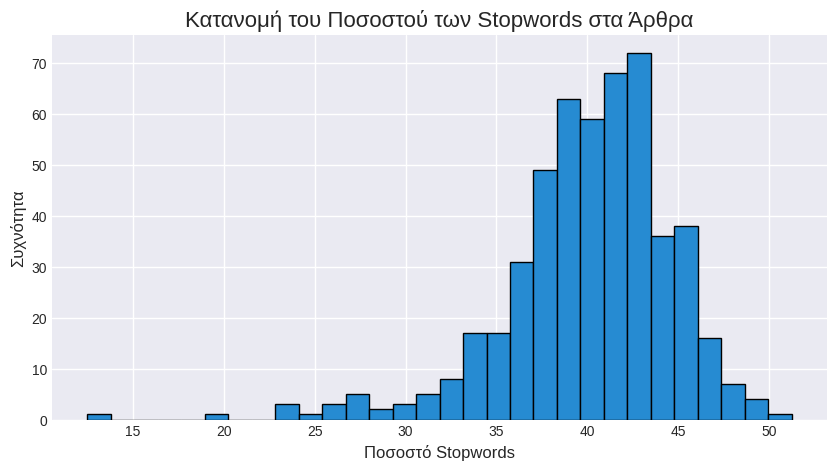

In [209]:
plt.figure(figsize=(10,5))
plt.hist(articles_df['stopwords_pct'], bins=30, edgecolor='black')
plt.title('Κατανομή του Ποσοστού των Stopwords στα Άρθρα')
plt.xlabel('Ποσοστό Stopwords')
plt.ylabel('Συχνότητα')
plt.show()

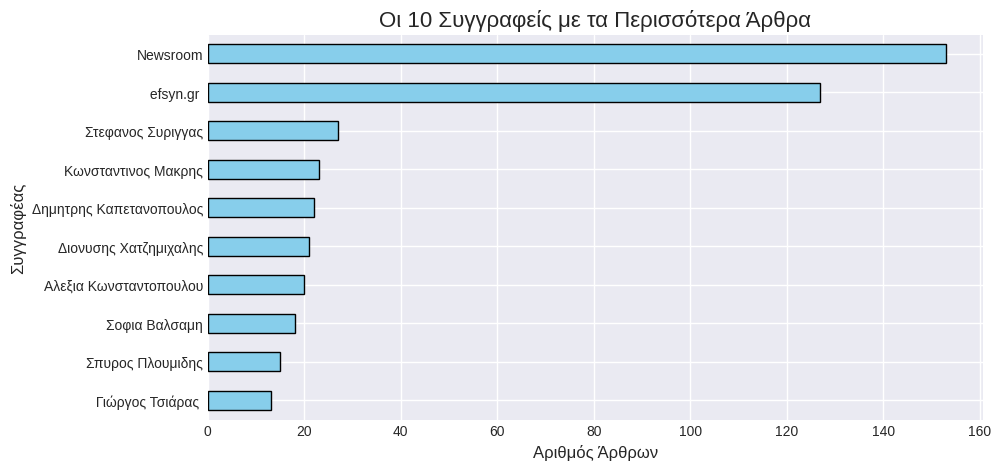

In [210]:
plt.figure(figsize=(10,5))
articles_df['author'].value_counts().head(10).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Οι 10 Συγγραφείς με τα Περισσότερα Άρθρα')
plt.xlabel('Αριθμός Άρθρων')
plt.ylabel('Συγγραφέας')
plt.gca().invert_yaxis()
plt.show()

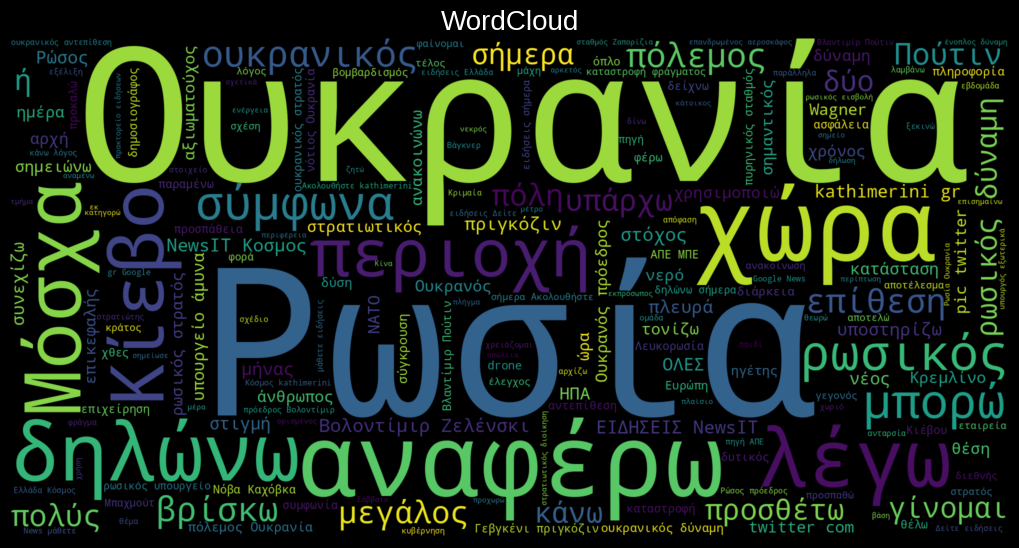

In [211]:
# Concatenate all text
text = articles_df['full_text'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
).generate(text)

# Display the generated image
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WordCloud', fontsize=20, color='white')
plt.show()

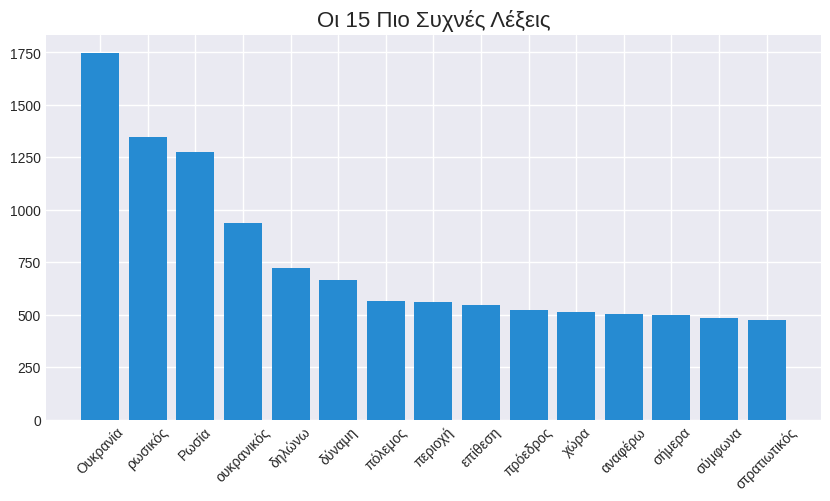

In [212]:
# Remove special characters
text_without_punctuation = ''.join([char for char in " ".join(articles_df['full_text']) if char not in string.punctuation])
custom_punctuation = string.punctuation + '«»“”'
text_without_punctuation = ''.join([char for char in " ".join(articles_df['full_text']) if char not in custom_punctuation])

# Counting all words
word_counts = Counter(text_without_punctuation.split())

# Finding 15 most common words
common_words = word_counts.most_common(15)

# Unzip the list of tuples
words, counts = zip(*common_words)

# Plotting
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title('Οι 15 Πιο Συχνές Λέξεις')
plt.xticks(rotation=45)
plt.show()


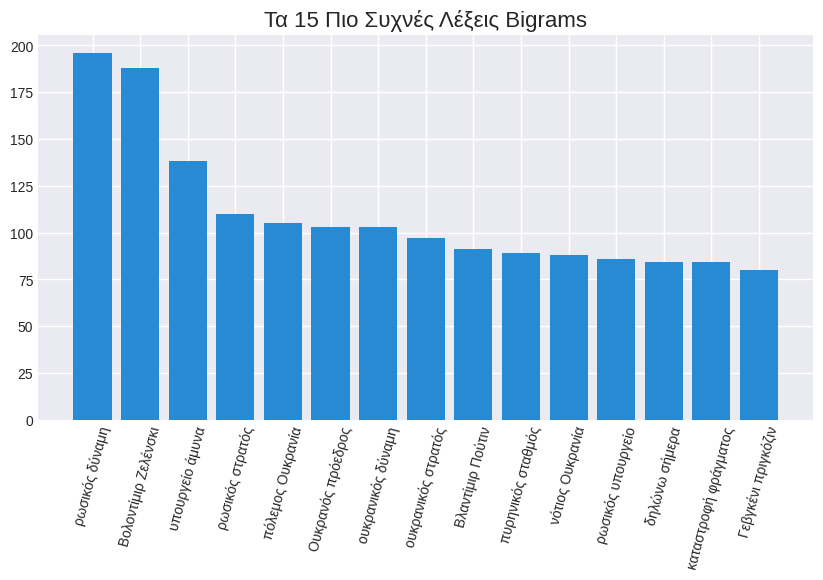

In [213]:
# Create list of bigrams
words = text_without_punctuation.split()
stop_bigrams = set(['ΟΛΕΣ ΟΙ', 'ΟΙ ΕΙΔΗΣΕΙΣ', 'ΕΙΔΗΣΕΙΣ NewsIT', 'NewsIT Κοσμος'])

bigrams = []
for i in range(len(words)-1):
    bigram = words[i] + ' ' + words[i+1]
    if bigram not in stop_bigrams:
        bigrams.append(bigram)

# Count the bigrams
bigram_counts = Counter(bigrams)

# Find 15 most common bigrams
common_bigrams = bigram_counts.most_common(15)

# Unzip the list of tuples
bigrams, counts = zip(*common_bigrams)


# Plotting
plt.figure(figsize=(10,5))
plt.bar(bigrams, counts)
plt.title('Τα 15 Πιο Συχνές Λέξεις Bigrams')
plt.xticks(rotation=75)
plt.show()


In [214]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [215]:
short_articles_df = articles_df[['datetime','full_text' ]].copy()
short_articles_df.tail()

,datetime,full_text
505,2023-06-03 23:55:23,"ώρα ναός έκλεινε , Πολωνός έβγαλε ρούχα στάθηκ..."
506,2023-06-03 23:44:49,κυβερνήτης περιοχή εκφράζω φόβους ένοικος μπορ...
507,2023-06-03 17:29:00,πιθανός στρατιωτικός « game changer » Ουκρανία...
508,2023-06-02 19:28:50,πολύνεκρος πόλεμος διεθνώς Β΄ς παγκόσμιος νομί...
509,2023-06-02 16:08:12,Ζελένσκι λέει Κίεβο γνωρίζω ενταχθεί ΝΑΤΟ τελε...


In [216]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [217]:
matrix = vec.fit_transform(short_articles_df['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [219]:
short_articles_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_articles_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_articles_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_articles_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_articles_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_articles_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_articles_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_articles_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_articles_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_articles_df['fear'] = wordcount_df[fear_words].sum(axis=1)

short_articles_df

,datetime,full_text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-07-09 11:05:00,ευκαιρία επικοινωνιακός σόου δίνω Ταγίπ ερντογ...,11,14,7,1,7,17,8,5,13,5
1,2023-07-08 20:03:00,μακρόν υπουργός εξωτερικά Λετονία Έντγκαρς Ρίν...,8,23,4,4,2,18,9,8,15,10
2,2023-07-08 16:54:00,Ρήγμα σχέση ΗΠΑ ευρωπαϊκός κράτος φαίνομαι δημ...,33,56,11,14,10,43,22,24,79,46
3,2023-07-08 13:48:00,"πόλεμος Ουκρανία , ρωσικός εισβολή 24 Φεβρουαρ...",58,56,13,13,18,33,28,47,95,68
4,2023-07-07 19:46:00,Ανεβάζω ένταση γεωπολιτικός διαμάχη επίκεντρο ...,20,39,7,8,7,33,22,9,31,16
...,...,...,...,...,...,...,...,...,...,...,...,...
505,2023-06-03 23:55:23,"ώρα ναός έκλεινε , Πολωνός έβγαλε ρούχα στάθηκ...",14,14,7,3,5,9,9,10,19,15
506,2023-06-03 23:44:49,κυβερνήτης περιοχή εκφράζω φόβους ένοικος μπορ...,3,2,1,0,2,2,2,1,5,4
507,2023-06-03 17:29:00,πιθανός στρατιωτικός « game changer » Ουκρανία...,20,46,7,8,15,34,28,15,41,33
508,2023-06-02 19:28:50,πολύνεκρος πόλεμος διεθνώς Β΄ς παγκόσμιος νομί...,26,24,6,7,11,15,12,35,48,36


In [220]:
short_articles_df.reset_index(inplace=True)
short_articles_df.set_index('datetime', inplace=True)
short_articles_df

,index,full_text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,
2023-07-09 11:05:00,0,ευκαιρία επικοινωνιακός σόου δίνω Ταγίπ ερντογ...,11,14,7,1,7,17,8,5,13,5
2023-07-08 20:03:00,1,μακρόν υπουργός εξωτερικά Λετονία Έντγκαρς Ρίν...,8,23,4,4,2,18,9,8,15,10
2023-07-08 16:54:00,2,Ρήγμα σχέση ΗΠΑ ευρωπαϊκός κράτος φαίνομαι δημ...,33,56,11,14,10,43,22,24,79,46
2023-07-08 13:48:00,3,"πόλεμος Ουκρανία , ρωσικός εισβολή 24 Φεβρουαρ...",58,56,13,13,18,33,28,47,95,68
2023-07-07 19:46:00,4,Ανεβάζω ένταση γεωπολιτικός διαμάχη επίκεντρο ...,20,39,7,8,7,33,22,9,31,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-03 23:55:23,505,"ώρα ναός έκλεινε , Πολωνός έβγαλε ρούχα στάθηκ...",14,14,7,3,5,9,9,10,19,15
2023-06-03 23:44:49,506,κυβερνήτης περιοχή εκφράζω φόβους ένοικος μπορ...,3,2,1,0,2,2,2,1,5,4
2023-06-03 17:29:00,507,πιθανός στρατιωτικός « game changer » Ουκρανία...,20,46,7,8,15,34,28,15,41,33


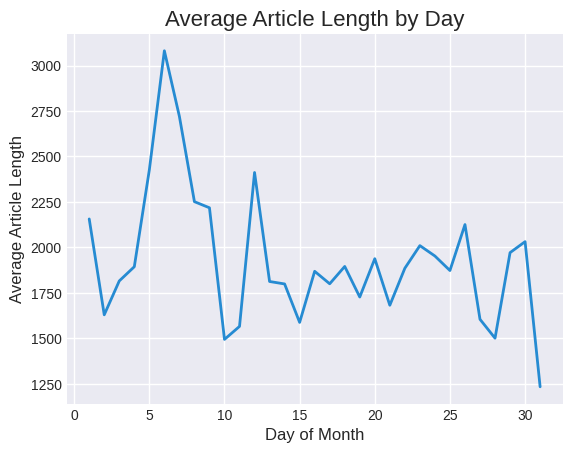

In [221]:
short_articles_df['full_text'].str.len().groupby(by=short_articles_df.index.day).mean().plot()

plt.xlabel('Day of Month')
plt.ylabel('Average Article Length')
plt.title('Average Article Length by Day')

plt.show()

<Axes: xlabel='datetime'>

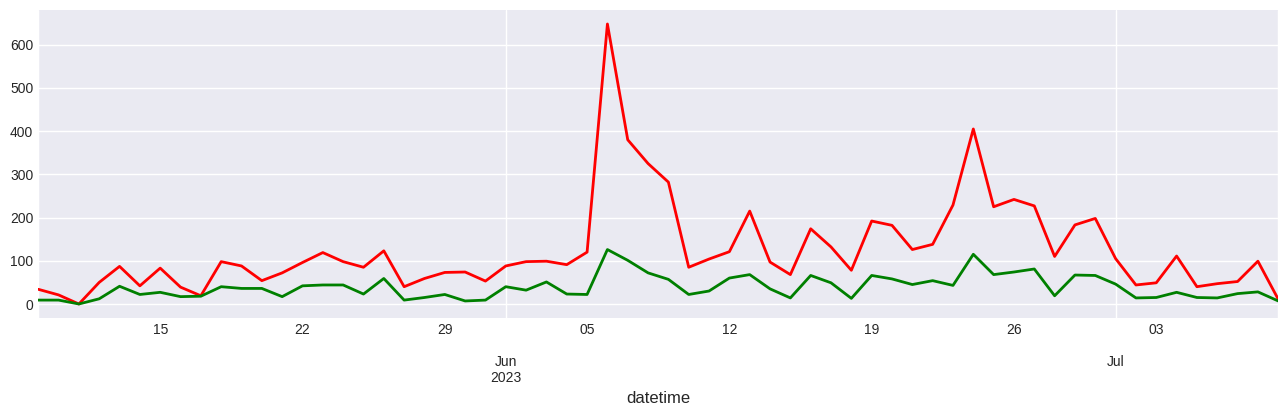

In [222]:
ax = short_articles_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_articles_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='datetime'>

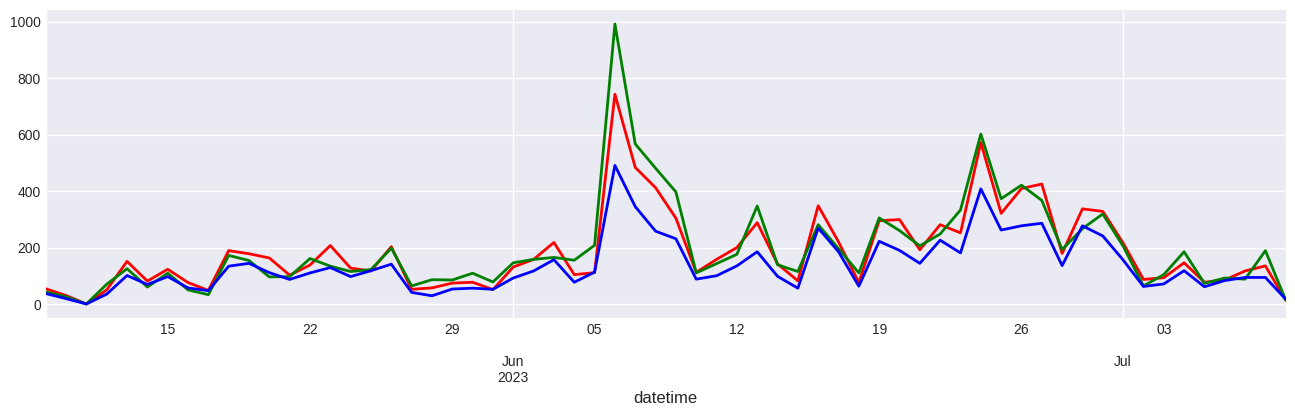

In [223]:
ax = short_articles_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_articles_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_articles_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [224]:
plt.style.use('Solarize_Light2')

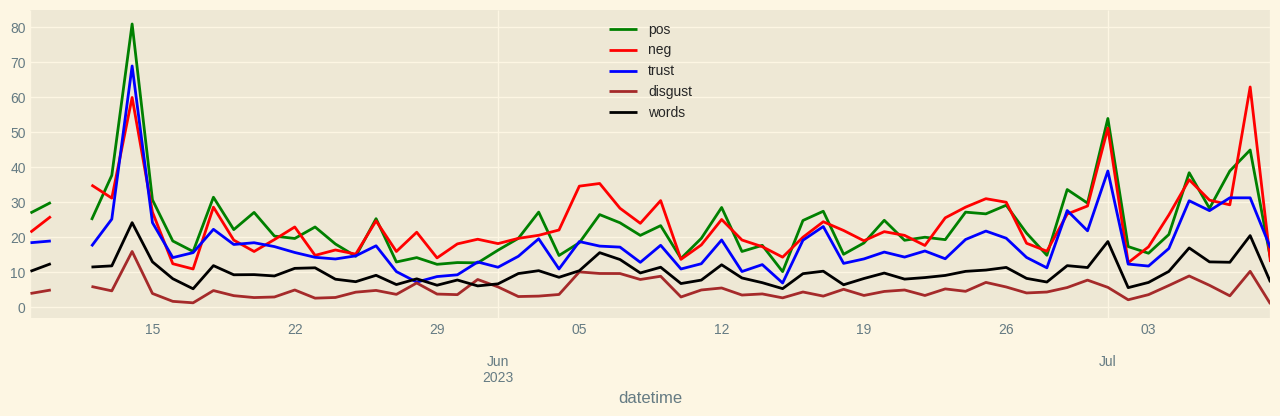

In [225]:
ax = short_articles_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_articles_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_articles_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_articles_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_articles_df['full_text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='datetime'>

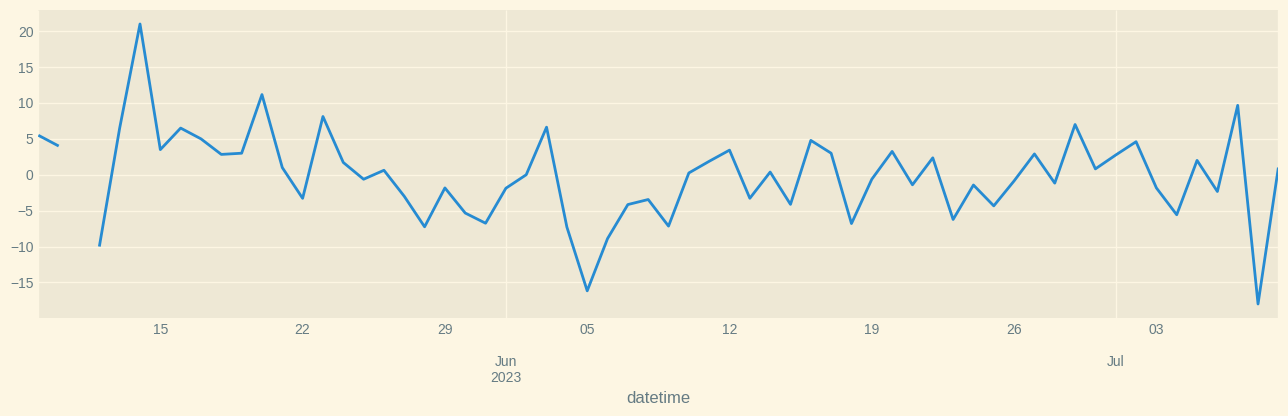

In [226]:
short_articles_df['pos/neg'] = short_articles_df['positive'] - short_articles_df['negative']
short_articles_df['pos/neg'].resample('D').mean().plot(figsize=(16,4))

In [227]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='datetime'>

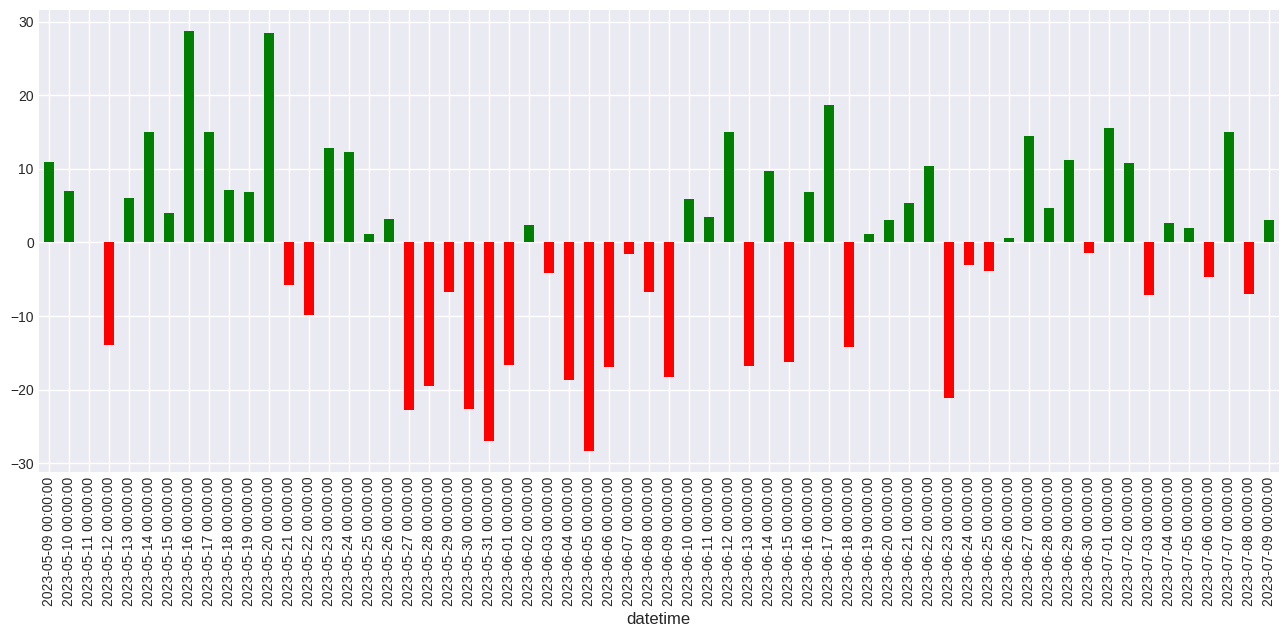

In [247]:
short_articles_df['(-)αρνητικότητα | θετικότητα(+)'] = short_articles_df.positive*100//short_articles_df[['positive','negative']].sum(
        axis=1) - short_articles_df.negative*100//short_articles_df[['positive','negative']].sum(axis=1)

short_articles_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_articles_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(16,6))

In [229]:
short_articles_df[(short_articles_df['(-)αρνητικότητα | θετικότητα(+)'] == short_articles_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_articles_df['(-)αρνητικότητα | θετικότητα(+)'] == short_articles_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
datetime,,,,
2023-06-21 21:58:13,206,10,0,100
2023-06-09 13:26:20,247,1,8,-77
2023-07-04 22:29:46,345,9,0,100


In [230]:
articles_df.loc[[44, 56], ['url','title', 'full_text']]

,url,title,full_text
44,https://www.efsyn.gr/kosmos/eyropi/395036_i-mo...,Η Μόσχα ζητά από μισθοφόρους να εγκαταλείψουν ...,ρωσικός υπουργείο άμυνα . Αμυντικά σύστημα ανα...
56,https://www.efsyn.gr/kosmos/eyropi/394392_spie...,Spiegel: Μόνο 20.000 βλήματα πυροβολικού έμειν...,αποκάλυψη ξεχωριστός ενδιαφέρον προβαίνω γερμα...


In [231]:
cv = CountVectorizer()
count_vector = cv.fit_transform(articles_df['full_text'])
count_vector.shape

(510, 16769)

In [232]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,02,04,05,0500,06,07,0xce3183500675bfd52c3bd6427ab9a1fd6804fc86,10,...,ύψος,ώθησαν,ώθηση,ώμο,ώμος,ώρα,ώς,володимир,зеленський,маскировка
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))
count_vector = cv.fit_transform(articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,02,04,05,0500,06,07,0xce3183500675bfd52c3bd6427ab9a1fd6804fc86,10,...,ύψος,ώθησαν,ώθηση,ώμο,ώμος,ώρα,ώς,володимир,зеленський,маскировка
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.2, max_df=0.8)
count_vector = cv.fit_transform(articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,2022,newsit,reuters,άμυνα,άνθρωπος,ανακοινώνω,ανατολικός,αναφέρω,αντεπίθεση,αξιωματούχος,...,συνεχίζω,σύμφωνα,υπάρχω,υπηρεσία,υποστηρίζω,υπουργείο,υπουργός,χθες,χώρα,ώρα
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,1,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,2,0,5,0
2,1,0,0,4,2,0,0,0,1,0,...,2,3,2,0,1,0,2,0,5,0
3,4,0,0,1,2,1,1,3,0,1,...,1,3,2,0,0,0,0,0,3,2
4,0,0,0,1,0,0,0,2,0,0,...,1,0,3,0,0,0,0,0,0,0


In [235]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αναφέρω,δηλώνω,δύναμη,επίθεση,κίεβο,λέγω,μόσχα,ουκρανία,ουκρανικός,περιοχή,πούτιν,πρόεδρος,πόλεμος,πόλη,ρωσία,ρωσικός,σήμερα,στρατιωτικός,σύμφωνα,χώρα
0,1,3,0,0,0,0,2,3,2,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,0,5,1,0,1,0,0,0,0,5
2,0,5,0,0,2,3,0,12,4,3,0,1,2,0,5,2,0,1,3,5
3,3,1,0,4,2,1,0,12,2,11,0,1,8,5,5,6,2,2,3,3
4,2,0,2,0,1,4,0,5,1,2,0,2,2,0,5,0,0,3,0,0


In [236]:
cv = CountVectorizer(stop_words=list(nlp.Defaults.stop_words), max_features=20, token_pattern=r'\bουκ[α-ωά-ώ]*\b')
count_vector = cv.fit_transform(articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,ουκρανά,ουκρανή,ουκρανία,ουκρανίας,ουκρανη,ουκρανια,ουκρανικά,ουκρανικές,ουκρανικο,ουκρανικος,ουκρανικων,ουκρανικό,ουκρανικός,ουκρανοί,ουκρανος,ουκρανους,ουκρανων,ουκρανό,ουκρανός,ουκρανών
0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,12,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0
3,0,0,12,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,4,0
4,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [237]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,kathimerini gr,newsit κοσμος,pic twitter,twitter com,απε μπε,βλαντίμιρ πούτιν,βολοντίμιρ ζελένσκι,γεβγκένι πριγκόζιν,νόβα καχόβκα,νότιος ουκρανία,ολες ειδησεις,ουκρανικός δύναμη,ουκρανικός στρατός,ουκρανός πρόεδρος,πυρηνικός σταθμός,πόλεμος ουκρανία,ρωσικός δύναμη,ρωσικός στρατός,ρωσικός υπουργείο,υπουργείο άμυνα
0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,2,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [238]:
results.sum(axis =0).sort_values(ascending = False)

ρωσικός δύναμη         196
βολοντίμιρ ζελένσκι    188
ολες ειδησεις          179
newsit κοσμος          175
kathimerini gr         156
υπουργείο άμυνα        138
ουκρανός πρόεδρος      116
twitter com            114
ρωσικός στρατός        110
pic twitter            108
πόλεμος ουκρανία       106
ουκρανικός δύναμη      103
γεβγκένι πριγκόζιν      99
ουκρανικός στρατός      97
απε μπε                 93
νόβα καχόβκα            93
βλαντίμιρ πούτιν        92
πυρηνικός σταθμός       89
νότιος ουκρανία         88
ρωσικός υπουργείο       87
dtype: int64

In [239]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

ρωσικός δύναμη         196
βολοντίμιρ ζελένσκι    188
ολες ειδησεις          179
newsit κοσμος          175
kathimerini gr         156
dtype: int64

In [240]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['ρωσία', 'ουκρανία', 'πόλεμος', 'νεκρός'])
count_vector = cv.fit_transform(articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,ρωσία,ουκρανία,πόλεμος,νεκρός
0,0,3,1,0
1,1,1,1,0
2,5,12,2,1
3,5,12,8,2
4,5,5,2,0


In [241]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(articles_df['full_text'])
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,000,10,12,16,17,20,2014,2022,2023,24,...,χρήση,χρειάζομαι,χρησιμοποιώ,χρόνος,χωριό,χώρα,όπλο,όχημα,ώρα,ώς
0,0.083766,0.000000,0.110605,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.097084
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.221965,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.089690,0.0,0.285010,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.030589,0.000000,0.000000,...,0.400536,0.073711,0.130561,0.032772,0.0,0.104142,0.166585,0.0,0.000000,0.000000
3,0.033401,0.041761,0.000000,0.0,0.0,0.0,0.000000,0.125207,0.067346,0.087568,...,0.163947,0.000000,0.033401,0.067072,0.0,0.063941,0.102279,0.0,0.055214,0.000000
4,0.045000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.045367,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [242]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

<Axes: >

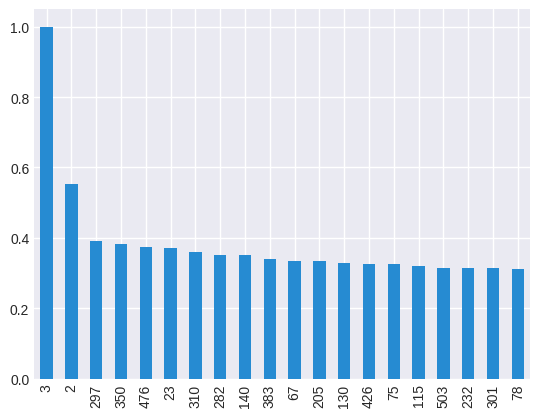

In [243]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [244]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:15]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

<Axes: title={'center': 'Βαθμός ομοιότητας των 15 πρώτων άρθρων'}>

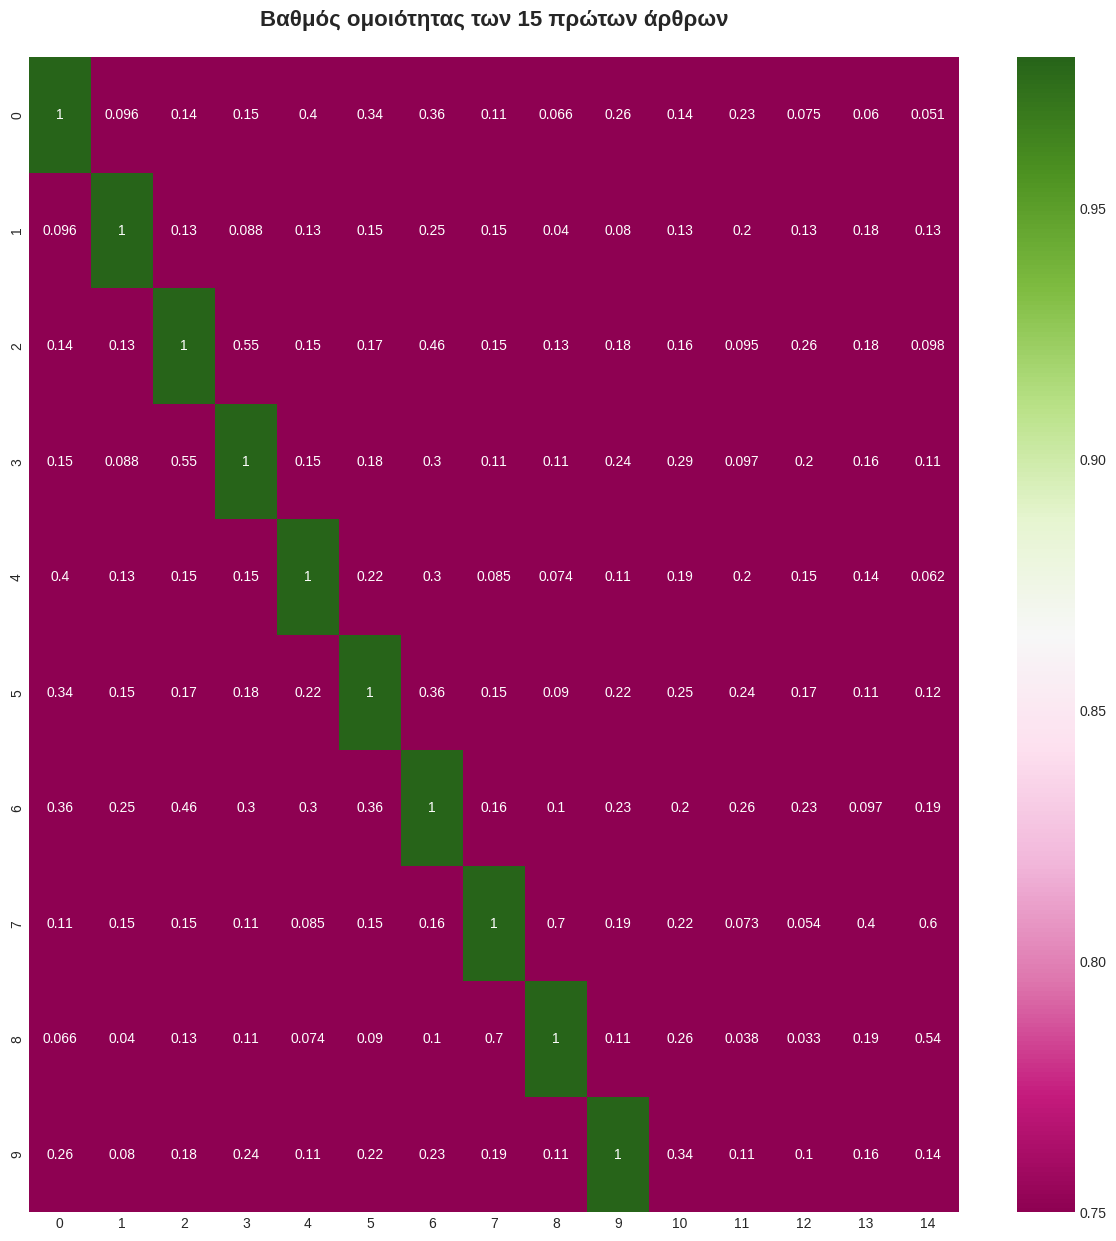

In [245]:
plt.figure(figsize=(15, 15))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 15 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

<Axes: title={'center': 'Βαθμός ομοιότητας των άρθρων από το efsyn.gr, το newsit.gr και το kathimerini.gr'}>

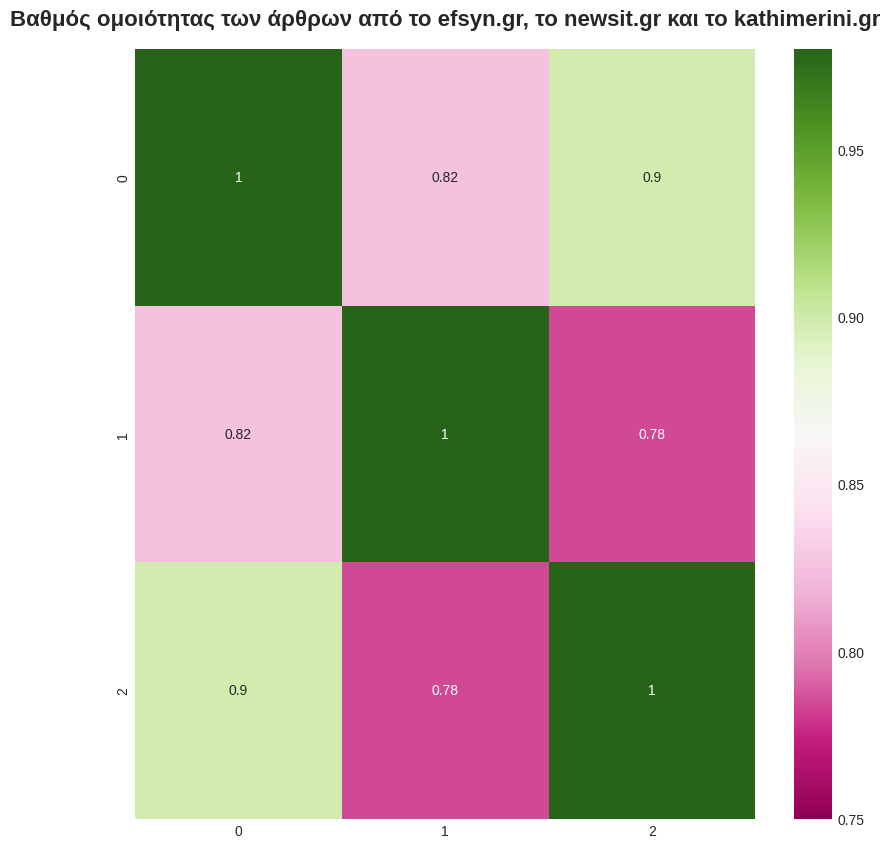

In [246]:
# φτιάχνω ένα text για κάθε site με συνένωση των κειμένων ολων των άρθρων του (full_text είναι το όνομα της στήλης με το πλήρες κείμενο - σε εσάς μπορεί να έχει άλλο όνομα)
efsyn_text = efsyn_full_articles_df['full_text'].str.cat(sep = ' ')
newsit_text = newsit_full_articles_df['full_text'].str.cat(sep = ' ')
kathimerini_text = kathimerini_full_articles_df['full_text'].str.cat(sep = ' ')

# φτιάχνω ένα df με τα δύο texts
three_sites_list = [] # φτιάχνω μια λίστα για να βάλω μέσα τα dictionaries που φτιάχνω παρακάτω
efsynD = {'site' : 'efsyn.gr', 'text' : efsyn_text} # φτιάχνω dictionary για την newsit
three_sites_list.append(efsynD) # βάζω το dictionary στη λίστα
newsitD = {'site' : 'newsit.gr', 'text' : newsit_text} # φτιάχνω dictionary για την newsit
three_sites_list.append(newsitD) # βάζω το dictionary στη λίστα
kathimeriniD = {'site' : 'kathimerini.gr', 'text' : kathimerini_text} # φτιάχνω dictionary για το kathimerini
three_sites_list.append(kathimeriniD) # βάζω το dictionary στη λίστα
three_sites_list = pd.DataFrame(three_sites_list) # φτιάχνω dataframe από τη λίστα με τα δύο dictionaries

# στον tfidf_vectorizer, βάζω να συγκρίνει τα rows της στήλης 'text' από το df των 2 sites που έφτιαξα
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(three_sites_list['text'])

# φτιάχνω το array της ομοιότητας
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

# φτιάχνω το heatmap
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το efsyn.gr, το newsit.gr και το kathimerini.gr', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")